In [31]:
%matplotlib notebook

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import re
import matplotlib.lines as mlines
import datetime as dt

## Define dictionary for reanalysis plotting color

In [33]:
color = {
         'MERRA2': '#E21F26',
         'MERRA': '#F69999',
         'ERAI': '#295F8A',
         'ERA5': '#5F98C6',
         'ERA40': '#AFCBE3',
         'JRA55': '#723B7A',
         'JRA-55C': '#AD71B5',
         'JRA-25': '#D6B8DA',
         'NCEP-R1': '#F57E20',
         'NCEP-R2': '#FDBF6E',
         '20CRv2c': '#EC008C',
         '20CRv2': '#F799D1',
         'CERA-20C': '#00AEEF',
         'ERA-20C': '#60C8E8',
         'CFSR': '#34A048',
         'REM': '#B35B28',
         'Other': '#FFD700',
         'Obs': '#000000',
         'Other Obs': '#777777',
        }

name_dict = {
         'cfsr': 'CFSR',
         'erai': 'ERAI',
         'gpcp': 'Obs',
         'jra55': 'JRA55',
         'merra': 'MERRA',
         'merra2': 'MERRA2',
         'ncepr1': 'NCEP-R1',
         'ncepr2': 'NCEP-R2',
         'twentyCRv2': '20CRv2',
         'twentyCRv2c': '20CRv2c',
         '20CRv2': '20CRv2',
         '20CRv2c': '20CRv2c',
         'era20c': 'ERA-20C'
         }

In [34]:
def read_data(filepath):
    """Reads csv file downloaded from NOAA WRIT"""
    p = re.compile(r'(?<=reanalysis_writ\\)\w+')
    df = pd.read_csv(filepath, header=None, skiprows=1, index_col='Date', 
                     names=['Date', name_dict[p.search(filepath).group(0)]],
                     parse_dates=True, na_values=-9999.000)
    return df

In [35]:
dirpath = r'C:\Users\apbarret\Documents\data\reanalysis_writ'
fileGlob = glob.glob( os.path.join(dirpath, '*.prate.global.month.smoothed.csv') )
fileGlob

df = pd.concat( [read_data(f) for f in fileGlob], axis=1 )
df.head()

,CFSR,ERAI,Obs,JRA55,MERRA,NCEP-R1,NCEP-R2,20CRv2,20CRv2c
Date,,,,,,,,,
1979-01-01,NaN,NaN,NaN,3.232,NaN,2.694,NaN,3.091,3.072
1979-02-01,NaN,NaN,NaN,3.228,NaN,2.693,NaN,3.086,3.068
1979-03-01,NaN,NaN,NaN,3.227,NaN,2.690,NaN,3.087,3.071
1979-04-01,NaN,NaN,NaN,3.221,NaN,2.690,NaN,3.087,3.069
1979-05-01,NaN,NaN,NaN,3.222,NaN,2.697,NaN,3.090,3.072


In [36]:
dirpath = r'C:\Users\apbarret\Documents\data\reanalysis_writ'
fileGlob = glob.glob( os.path.join(dirpath, '*.prate.70Nto90N.ocean.month.smoothed.csv') )
fileGlob

df_arctic = pd.concat( [read_data(f) for f in fileGlob], axis=1 )
df_arctic.head()

,20CRv2c,CFSR,ERAI,Obs,JRA55,MERRA,NCEP-R1,NCEP-R2
Date,,,,,,,,
1979-01-01,1.023,NaN,NaN,NaN,0.937,NaN,0.757,NaN
1979-02-01,1.031,NaN,NaN,NaN,0.954,NaN,0.765,NaN
1979-03-01,1.057,NaN,NaN,NaN,0.983,NaN,0.782,NaN
1979-04-01,1.049,NaN,NaN,NaN,0.977,NaN,0.776,NaN
1979-05-01,1.037,NaN,NaN,NaN,0.965,NaN,0.779,NaN


In [37]:
dirpath = r'C:\Users\apbarret\Documents\data\reanalysis_writ'
fileGlob = glob.glob( os.path.join(dirpath, '*.pwat.70Nto90N.ocean.month.smoothed.csv') )
fileGlob

df_arctic_pwat = pd.concat( [read_data(f) for f in fileGlob], axis=1 )
df_arctic_pwat.head()

,20CRv2c,CFSR,ERA-20C,ERAI,JRA55,MERRA,MERRA2,NCEP-R1,NCEP-R2
Date,,,,,,,,,
1979-01-01,7.003,NaN,5.450,NaN,5.950,NaN,NaN,6.489,NaN
1979-02-01,7.005,NaN,5.507,NaN,6.020,NaN,NaN,6.557,NaN
1979-03-01,7.093,NaN,5.548,NaN,6.094,NaN,NaN,6.626,NaN
1979-04-01,7.077,NaN,5.547,NaN,6.094,NaN,NaN,6.623,NaN
1979-05-01,7.086,NaN,5.538,NaN,6.082,NaN,NaN,6.613,NaN


## Get my MERRA2 series

In [43]:
dirpath = r'C:\Users\apbarret\Documents\data\reanalysis_writ'
filepath = os.path.join(dirpath, 'merra2_global_mean_prectot.csv')
merra2 = pd.read_csv(filepath, header=0, index_col=0, parse_dates=True)
merra2 = merra2.rolling(center=True, window=12).mean(how='mean')
merra2.rename({'prectot':'MERRA2'},axis=1)
merra2.head()

df['MERRA2'] = merra2
df.head(20)

,CFSR,ERAI,Obs,JRA55,MERRA,NCEP-R1,NCEP-R2,20CRv2,20CRv2c,MERRA2
Date,,,,,,,,,,
1979-01-01,NaN,NaN,NaN,3.232,NaN,2.694,NaN,3.091,3.072,NaN
1979-02-01,NaN,NaN,NaN,3.228,NaN,2.693,NaN,3.086,3.068,NaN
1979-03-01,NaN,NaN,NaN,3.227,NaN,2.690,NaN,3.087,3.071,NaN
1979-04-01,NaN,NaN,NaN,3.221,NaN,2.690,NaN,3.087,3.069,NaN
1979-05-01,NaN,NaN,NaN,3.222,NaN,2.697,NaN,3.090,3.072,NaN
1979-06-01,3.105,2.896,2.672,3.218,2.390,2.703,3.047,3.089,3.068,NaN
1979-07-01,3.106,2.903,2.670,3.218,2.390,2.701,3.051,3.087,3.066,NaN
1979-08-01,3.104,2.905,2.662,3.218,2.393,2.699,3.046,3.087,3.063,NaN
1979-09-01,3.107,2.912,2.659,3.222,2.397,2.709,3.054,3.090,3.068,NaN


In [59]:
dirpath = r'C:\Users\apbarret\Documents\data\reanalysis_writ'
filepath = os.path.join(dirpath, 'era5.precip_rate.global_mean.csv')
era5 = pd.read_csv(filepath, header=0, index_col=0, parse_dates=True)
era5 = era5.rolling(center=True, window=12).mean(how='mean')
era5.head()

df['ERA5'] = era5
df.tail(20)

,CFSR,ERAI,Obs,JRA55,MERRA,NCEP-R1,NCEP-R2,20CRv2,20CRv2c,MERRA2,ERA5
Date,,,,,,,,,,,
2017-05-01,NaN,2.971,2.699,3.349,NaN,2.866,3.340,NaN,NaN,NaN,NaN
2017-06-01,NaN,2.969,2.700,3.345,NaN,2.863,3.340,NaN,NaN,NaN,NaN
2017-07-01,NaN,2.975,2.703,3.347,NaN,2.871,3.347,NaN,NaN,NaN,NaN
2017-08-01,NaN,2.977,2.705,3.342,NaN,2.865,3.341,NaN,NaN,NaN,NaN
2017-09-01,NaN,2.980,2.705,3.338,NaN,2.863,3.336,NaN,NaN,NaN,NaN
2017-10-01,NaN,2.984,2.697,3.335,NaN,2.858,3.331,NaN,NaN,NaN,NaN
2017-11-01,NaN,2.987,2.687,3.333,NaN,2.858,3.331,NaN,NaN,NaN,NaN
2017-12-01,NaN,2.986,2.683,3.330,NaN,2.857,3.334,NaN,NaN,NaN,NaN
2018-01-01,NaN,2.986,2.682,3.327,NaN,2.860,3.339,NaN,NaN,NaN,NaN


In [64]:
dirpath = r'C:\Users\apbarret\Documents\data\reanalysis_writ'
filepath = os.path.join(dirpath, 'era5.precip_rate.arctic.csv')
era5_arctic = pd.read_csv(filepath, header=0, index_col=0, parse_dates=True)
era5_arctic = era5_arctic.rolling(center=True, window=12).mean(how='mean')
era5_arctic.head()

df_arctic['ERA5'] = era5_arctic
#df_arctic.tail(20)

<IPython.core.display.Javascript object>


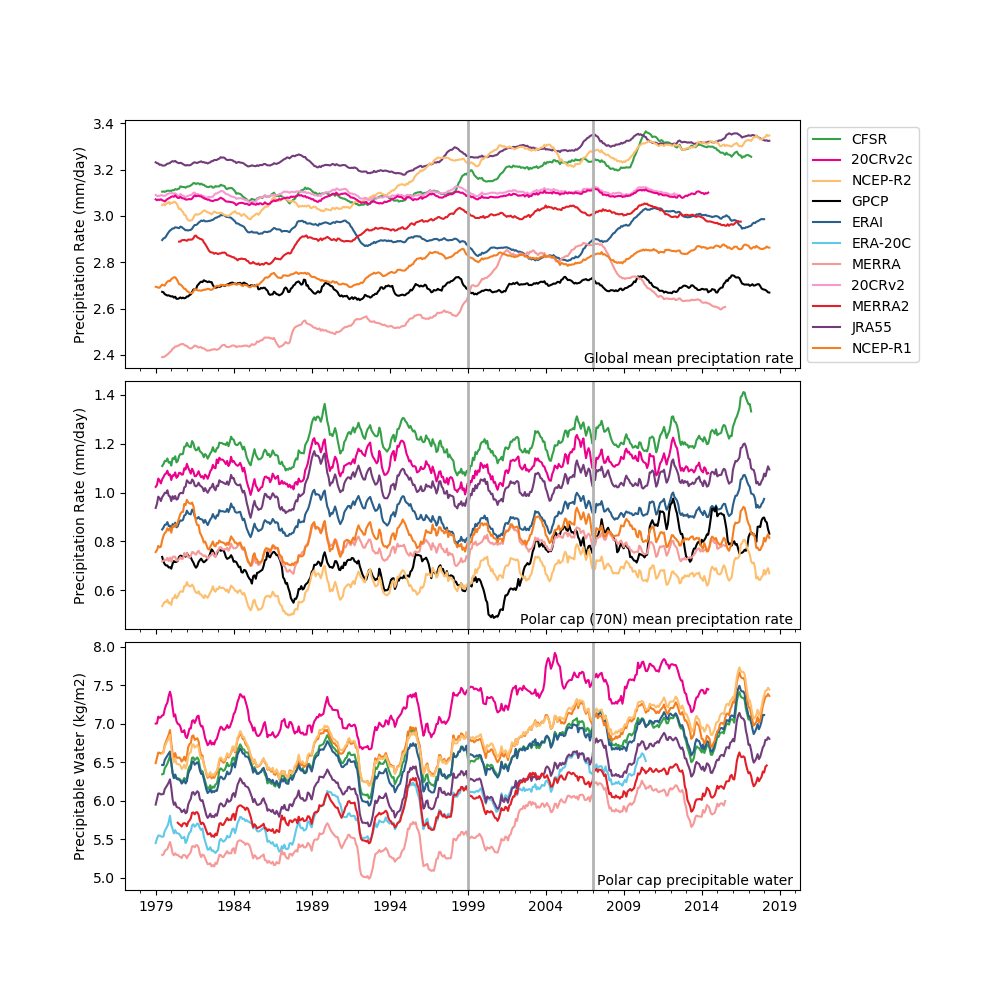

In [44]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

df.plot(ax=ax[0], color=[color[c] for c in df.columns], legend=False)
#merra2.plot(ax=ax[0], color=color['MERRA2'], legend=False)
ax[0].set_ylabel('Precipitation Rate (mm/day)')
ax[0].set_xlabel('')
ax[0].set_xticklabels([])
ax[0].text(0.99, 0.01, 'Global mean preciptation rate', horizontalAlignment='right', 
           verticalAlignment='bottom', transform=ax[0].transAxes)
ax[0].axvline(dt.datetime(1999,1,1), color='0.7', lw=2)
ax[0].axvline(dt.datetime(2007,1,1), color='0.7', lw=2)

df_arctic.plot(ax=ax[1], color=[color[c] for c in df_arctic.columns], legend=False)
ax[1].set_ylabel('Precipitation Rate (mm/day)')
ax[1].set_xlabel('')
ax[1].set_xticklabels([])
ax[1].text(0.99, 0.01, 'Polar cap (70N) mean preciptation rate', horizontalAlignment='right', 
           verticalAlignment='bottom', transform=ax[1].transAxes)
ax[1].axvline(dt.datetime(1999,1,1), color='0.7', lw=2)
ax[1].axvline(dt.datetime(2007,1,1), color='0.7', lw=2)

df_arctic_pwat.plot(ax=ax[2], color=[color[c] for c in df_arctic_pwat.columns], legend=False)
ax[2].set_ylabel('Precipitable Water (kg/m2)')
ax[2].text(0.99, 0.01, 'Polar cap precipitable water', horizontalAlignment='right', 
           verticalAlignment='bottom', transform=ax[2].transAxes)
ax[2].axvline(dt.datetime(1999,1,1), color='0.7', lw=2)
ax[2].axvline(dt.datetime(2007,1,1), color='0.7', lw=2)
ax[2].set_xlabel('')

# Make legend handles and labels
labels = list( set(df.columns.tolist()+df_arctic.columns.tolist()+df_arctic_pwat.columns.tolist()) )
handles = [mlines.Line2D([], [], color=color[l],) for l in labels]
labels = [l if l != 'Obs' else 'GPCP' for l in labels]

ax[0].legend(handles, labels, loc='upper left', bbox_to_anchor=(1.0, 1.))
plt.subplots_adjust(right=0.8, hspace=0.05)

In [55]:
these = list(set(names).intersection(df.columns.tolist()))
these

['CFSR', 'Obs', 'ERAI', 'MERRA', 'MERRA2', 'JRA55']

<IPython.core.display.Javascript object>


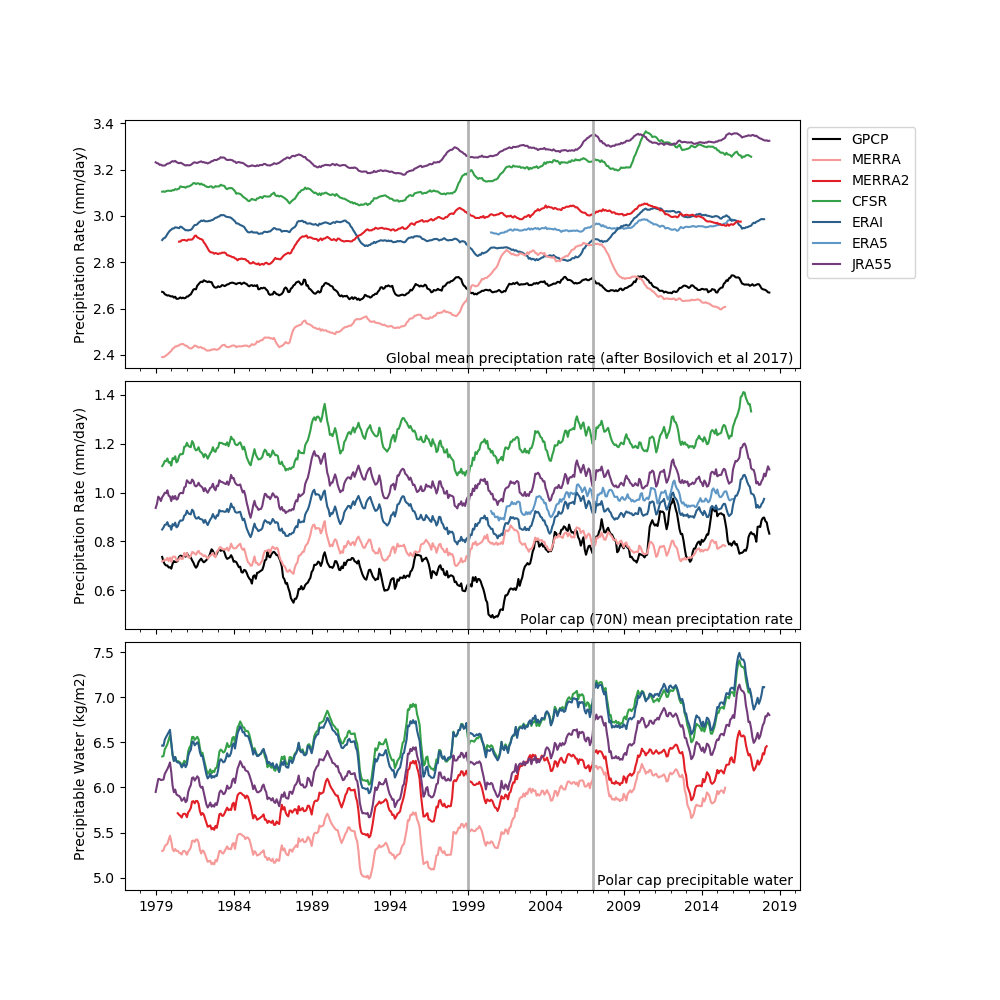

In [98]:
names = ['Obs', 'MERRA', 'MERRA2', 'CFSR', 'ERAI', 'ERA5', 'JRA55']
fig, ax = plt.subplots(3, 1, figsize=(10,10))

these = list(set(names).intersection(df.columns.tolist()))
df[these].plot(ax=ax[0], color=[color[c] for c in df[these].columns], legend=False)
#merra2.plot(ax=ax[0], color=color['MERRA2'], legend=False)
ax[0].set_ylabel('Precipitation Rate (mm/day)')
ax[0].set_xlabel('')
ax[0].set_xticklabels([])
ax[0].text(0.99, 0.01, 'Global mean preciptation rate (after Bosilovich et al 2017)', horizontalAlignment='right', 
           verticalAlignment='bottom', transform=ax[0].transAxes)
ax[0].axvline(dt.datetime(1999,1,1), color='0.7', lw=2)
ax[0].axvline(dt.datetime(2007,1,1), color='0.7', lw=2)
#ax[0].axvline(dt.datetime(2010,1,1), color='orange', lw=2)

these = list(set(names).intersection(df_arctic.columns.tolist()))
df_arctic[these].plot(ax=ax[1], color=[color[c] for c in df_arctic[these].columns], legend=False)
ax[1].set_ylabel('Precipitation Rate (mm/day)')
ax[1].set_xlabel('')
ax[1].set_xticklabels([])
ax[1].text(0.99, 0.01, 'Polar cap (70N) mean preciptation rate', horizontalAlignment='right', 
           verticalAlignment='bottom', transform=ax[1].transAxes)
ax[1].axvline(dt.datetime(1999,1,1), color='0.7', lw=2)
ax[1].axvline(dt.datetime(2007,1,1), color='0.7', lw=2)

these = list(set(names).intersection(df_arctic_pwat.columns.tolist()))
df_arctic_pwat[these].plot(ax=ax[2], color=[color[c] for c in df_arctic_pwat[these].columns], legend=False)
ax[2].set_ylabel('Precipitable Water (kg/m2)')
ax[2].text(0.99, 0.01, 'Polar cap precipitable water', horizontalAlignment='right', 
           verticalAlignment='bottom', transform=ax[2].transAxes)
ax[2].axvline(dt.datetime(1999,1,1), color='0.7', lw=2)
ax[2].axvline(dt.datetime(2007,1,1), color='0.7', lw=2)
ax[2].set_xlabel('')

# Make legend handles and labels
labels = names #list( set(df.columns.tolist()+df_arctic.columns.tolist()+df_arctic_pwat.columns.tolist()) )
handles = [mlines.Line2D([], [], color=color[l],) for l in labels]
labels = [l if l != 'Obs' else 'GPCP' for l in labels]

ax[0].legend(handles, labels, loc='upper left', bbox_to_anchor=(1.0, 1.))
plt.subplots_adjust(right=0.8, hspace=0.05)

fig.savefig('reanalysis_global_precipitation_rate.png')

In [77]:
filepath = os.path.join(dirpath, 'era5.precip_rate.arctic.annual.csv')
era5_ann = pd.read_csv(filepath, header=0, index_col=0, parse_dates=True)
era5_ann['ERA5']['2000':'2015']

time
2000-01-01    0.925633
2001-01-01    0.944594
2002-01-01    0.915047
2003-01-01    0.984261
2004-01-01    0.918071
2005-01-01    0.981128
2006-01-01    1.021514
2007-01-01    1.000169
2008-01-01    0.982690
2009-01-01    0.965565
2010-01-01    0.982040
2011-01-01    1.000451
2012-01-01    1.008673
2013-01-01    0.948848
2014-01-01    0.967139
2015-01-01    1.004693
Name: ERA5, dtype: float64

<IPython.core.display.Javascript object>


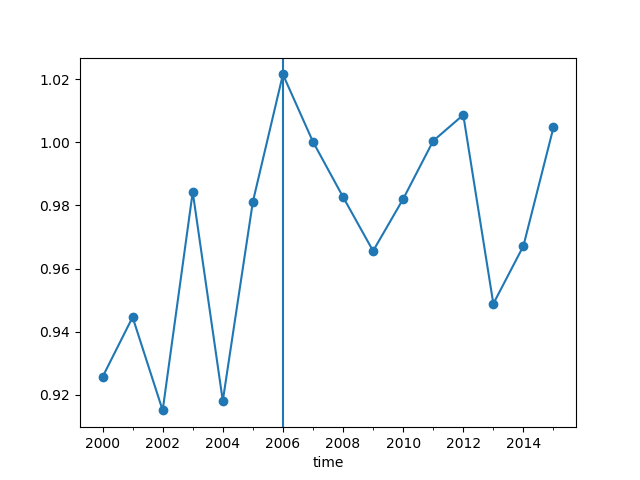

In [78]:
era5_ann['ERA5']['2000':'2015'].plot(marker='o')
plt.axvline(dt.datetime(2006,1,1))